In [96]:
import pandas as pd

# komoran.morphs : 형태소 분리
# komoran.pos : 토크나이징된 형태소들에 품사를 대응시킴
# komoran.nouns : 명사만 추출가능

# kkma.sentences() : 문장별로 구분

# okt.normalize() : 맞춤법
# okt.phrases() : 어구 단위로 추출

In [97]:
# from google.colab import drive
# drive.mount('/content/drive')

In [98]:
from konlpy.tag import Komoran
import pickle

class Preprocess:

  def __init__(self,userdic=None):

    self.komoran = Komoran(userdic=userdic)

    self.exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
    # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
    'JX', 'JC',
    # 보조사, 접속조사
    'SF', 'SP', 'SS', 'SE', 'SO',
    # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
    'EP', 'EF', 'EC', 'ETN', 'ETM',
    # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
    'XSN', 'XSV', 'XSA'
    # 명사파생접미사, 동사파생접미사, 형용사파생접미사
    ]
        
    # 형태소 분석기 POS 태거
  def pos(self, sentence):
    return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
  def get_keywords(self, pos, without_tag=False):
    f = lambda x: x in self.exclusion_tags
    print(pos)
    word_list = []
    for p in pos:
        if f(p[1]) is False:
            word_list.append(p if without_tag is False else p[0])
    return word_list



In [99]:
sent = "컴공 과사 번호를 알려줘 병신아!"

# userdic 
# https://needjarvis.tistory.com/741
# 직접 우리 프로젝트 테마에 맞게 등록하면됌
# ex)
# 짜장면 NNG

# 전처리 객체
p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

# 형태소 분석기
pos = p.pos(sent)

# 키워드,품사 출력
ret = p.get_keywords(pos,without_tag=False) 
# False로 했기 때문에 품사가 포함됌
# ex) 를 JKO
ret

[('컴공', 'NNP'), ('과사', 'NNP'), ('번호', 'NNG'), ('를', 'JKO'), ('알리', 'VV'), ('어', 'EC'), ('주', 'VX'), ('어', 'EC'), ('병신', 'NNP'), ('아', 'JKV'), ('!', 'SF')]


[('컴공', 'NNP'),
 ('과사', 'NNP'),
 ('번호', 'NNG'),
 ('알리', 'VV'),
 ('주', 'VX'),
 ('병신', 'NNP')]

In [100]:
import pandas as pd
import pickle

# 말뭉치 데이터 읽어오기
movie_review = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/영화리뷰.csv',encoding='CP949')
purpose = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/용도별목적대화데이터.csv',encoding='CP949')
common_sense = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/일반상식.csv',encoding='CP949')
topic = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/주제별일상대화데이터.csv',encoding='CP949')

In [101]:
topic.head()

,text
0,애덜앙 나 너무 배불러서 배 아파
1,배 아프면 약국 가서 소화제라도 마시는 거 어때
2,얼마나 먹었다고 배가 아프데
3,떡볶이랑 튀김이랑 닭껍질튀김이랑 마카롱 먹었어
4,하긴 *이 배는 파리보다 작으니까 당연히 그만큼 먹어도 배부르지


In [102]:
common_sense.head()

,intent,query,answer
0,일반상식,다테 기미코가 최초로 은퇴 선언을 한게 언제지,1996년 9월 24일
1,일반상식,ave;new 본거지 어디야,도쿄 치요다구
2,일반상식,사카이 다다요시의 아버지가 누구지,사카이 나오타카(酒井直隆)
3,일반상식,일반성면의 면적이 얼마야,19.41 km²
4,일반상식,금나라를 세운 사람이 누구야,태조 아구다


In [103]:
# 결측값 제거
movie_review.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)

In [104]:
text1 = list(movie_review['document'])
text2 = list(purpose['text'])
text3 = list(topic['text'])
text4 = list(common_sense['query'])+list(common_sense['answer'])

In [105]:
corpus_data = text1 + text2 + text3 + text4

In [106]:
from tqdm import tqdm

# 말뭉치 데이터에서 키워드(단어)만 추출하여 사전 리스트 생성
# 약 20분 소요
p = Preprocess()

dict1 = []
for c in tqdm(corpus_data):
  pos = p.pos(c)
  for k in pos:
    dict1.append(k[0])

dict1[:50]

100%|██████████| 2263322/2263322 [18:09<00:00, 2078.10it/s]


['어리',
 'ㄹ',
 '때',
 '보고',
 '지금',
 '다시',
 '보',
 '아도',
 '재밌어요ㅋㅋ',
 '디자인',
 '을',
 '배우',
 '는',
 '학생',
 '으로',
 ',',
 '외국',
 '디자이너',
 '와',
 '그',
 '들',
 '이',
 '일구',
 'ㄴ',
 '전통',
 '을',
 '통하',
 '아',
 '발전',
 '하',
 '아',
 '가',
 '는',
 '문화',
 '산업',
 '이',
 '부럽',
 '었',
 '는데',
 '.',
 '사실',
 '우리나라',
 '에서',
 '도',
 '그',
 '어렵',
 'ㄴ',
 '시절',
 '에',
 '끝']

In [107]:
from tensorflow.keras import preprocessing
# 사전에 사용될 word2index 생성
# 사전의 첫번쨰 인덱스에는 OOV 사용
# OOV : 사전에 없는 단어는 word2index = 1로 바꿔줌

# OOV token 이란? https://hyoeun-log.tistory.com/entry/WEEK1-NLP-in-Tensorflow-Tokenizer-OOV-token-padsequences

tokenizer = preprocessing.text.Tokenizer(oov_token='OOV', num_words=100000)
tokenizer.fit_on_texts(dict1)
word_index = tokenizer.word_index
print(len(word_index))

157410


In [108]:
# bin 파일로 만들면 데이터 전송 시 빠르다(?)
f = open("chatbot_dict.bin","wb")
try:
  pickle.dump(word_index,f)
except Exception as e:
  print(e)
finally:
  f.close()

In [109]:
f = open("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin","rb")
word_index = pickle.load(f)
f.close()

# 확인1

# 전처리 객체 생성
p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

# 예문
sent1 = "안녕하세요.테스트 코드 입니다. 단어사전 만들기 성공?"

# 형태소 분석
pos = p.pos(sent1)

# 품사 태그없이 키워드 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,wird_index['OOV'])

[('안녕하세요', 'NNP'), ('.', 'SF'), ('테스트', 'NNP'), ('코드', 'NNP'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('단어', 'NNG'), ('사전', 'NNP'), ('만들', 'VV'), ('기', 'ETN'), ('성공', 'NNG'), ('?', 'SF')]
안녕하세요 137
테스트 2438
코드 1907
이 3
단어 1941
사전 2030
만들 164
성공 1275


In [110]:
# 확인2

# 전처리 객체 생성
p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

# 예문
sent2 = "최종 프로젝트 잘 마치고 취업합시다! 화이팅! 취뽀 가자! 오늘 점심 호호반점 갈까?"

# 형태소 분석
pos = p.pos(sent2)

# 품사 태그없이 키워드(단어만) 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

[('최종', 'NNG'), ('프로젝트', 'NNP'), ('잘', 'MAG'), ('마치', 'VV'), ('고', 'EC'), ('취업', 'NNG'), ('하', 'XSV'), ('ㅂ시다', 'EF'), ('!', 'SF'), ('화이팅', 'NNP'), ('!', 'SF'), ('취뽀', 'NA'), ('가', 'VV'), ('자', 'EF'), ('!', 'SF'), ('오늘', 'NNG'), ('점심', 'NNP'), ('호', 'NNB'), ('호반', 'NNP'), ('점', 'NNB'), ('가', 'VV'), ('ㄹ까', 'EF'), ('?', 'SF')]
최종 3560
프로젝트 3559
잘 61
마치 1864
취업 959
화이팅 2058
취뽀 40470
가 8
오늘 165
점심 1031
호 1188
호반 18172
점 176
가 8


In [111]:
# 전처리 클래스에
#  단어 인덱스 사전 추가함

class Preprocess:
    def __init__(self, word2index_dic='../train_tools/dict/chatbot_dict.bin' ,userdic='user_dic.tsv'): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 단어,품사 정보만 가져오기
    # True시 품사없이 단어만 list로 가져옴
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

#의도 분류 모델 학습 데이터 생성하기

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

In [113]:
movie = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/영화리뷰.csv",encoding='CP949')
purpose = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/용도별목적대화데이터.csv",encoding='CP949')
topic = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/주제별일상대화데이터.csv",encoding='CP949')
common_sense = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/일반상식.csv",encoding='CP949')
add = pd.read_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/추가데이터.csv",encoding='CP949')

In [114]:
movie.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
add.dropna(inplace=True)

In [115]:
print(f"movie shape => {movie.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
add => {add.shape}")

movie shape => (199992, 3)
purpose shape => (480494, 1)
topic shape => (1445760, 1)
common_sense shape => (68538, 3)
add => (9216, 2)


In [116]:
movie.columns

Index(['id', 'document', 'label'], dtype='object')

In [117]:
purpose.columns

Index(['text'], dtype='object')

In [118]:
topic.columns

Index(['text'], dtype='object')

In [119]:
common_sense.columns

Index(['intent', 'query', 'answer'], dtype='object')

In [120]:
add.columns

Index(['query', 'intent'], dtype='object')

In [121]:
all_data = list(movie['document']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer']) + list(add['query'])

In [122]:
len(all_data)

2272538

In [123]:
# 통합본 생성하고 저장하기
total = pd.DataFrame({'text': all_data})
total.to_csv("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/통합본데이터.csv", index=False)
total.head()

,text
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산..."
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.


In [124]:
total.tail()

,text
2272533,흡연충이 언제 슈퍼영웅이 되었냐?
2272534,페이스북에 잘난부모둔게죄냐는 글올린 당당함은 언제그랫었냐는듯 전혀다른사람같은태도군
2272535,언제환기시킬수 있는지 모르겠다 거의 미세먼지라서 그런지
2272536,스스로나가면 스스로나가면 연봉 안줘도되고 짜르면 남은 기간 연봉 다줘야하고 그게 팩트다
2272537,언제까지 인터넷여론이 진짜 여론인줄알거야? ㅋㅋ


In [125]:
# 의도 분류 데이터 생성하기
# 0 -> 번호, 1 -> 장소, 2 -> 시간, 3 -> 기타

number = []
place = []
time = []
etc = []

In [126]:
for i in all_data:
  # place.append() , 장소 묻기
  # number.append() ,번호 묻기
  # time.append(), 시간 묻기
  # etc.append(), 기타 요청

  # 모든 문장 데이터들을 합하고
  # * 의도에 따라 문장들을 분류함!

  if ('어디' or '장소' or '위치' or '주소') in i:
    place.append(i)
  elif ('번호' or '전화') in i:
    number.append(i)
  elif ('시작' or '마감' or '언제' or '기간' or '시간') in i:
    time.append(i)
  else:
    etc.append(i)
len(place),len(number),len(time), len(etc)

(29336, 12512, 8332, 2222358)

In [127]:
# 의도별 라벨 붙히기

number_label = []
for _ in range(len(number)):
    number_label.append(0)

time_label = []
for _ in range(len(time)):
    time_label.append(2)

place_label = []
for _ in range(len(place)):
    place_label.append(1)
len(place_label) , len(number_label) , len(time_label)

(29336, 12512, 8332)

In [128]:
train_df = pd.DataFrame({'text':number+place+time,
                         'label':number_label+place_label+time_label})

In [129]:
train_df.head()

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,0
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,0
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,0
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,0
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,0


In [130]:
train_df.sample(5)

,text,label
4182,#@이름#이고 전화번호 아마 #@전번# 일 거예요,0
34955,자메이카 블루 마운틴 인증 기관이 어디야,1
35053,오카자키 가쓰오는 어디에서 태어났어,1
35418,메르코수르에 참여하고 있는 회원국은 어디야,1
9521,네 주문자분 성함이랑 휴대폰 번호 말씀해 주시겠습니까,0


In [131]:
train_df.sample(5)

,text,label
46385,키키 시작해볼까 ...,2
23176,요즘 남자 옷 쇼핑몰 어디가 제일 인기 많아?,1
48765,최근에 연습 시작했어,2
30382,"요즘은 성범죄자를 인터넷에서 다 조회가 가능하고, 어디 사는지도 알 수 있잖아",1
41319,삼정과 주문 어디서 하죠?,1


In [132]:
# 0 -> 번호, 1 -> 장소, 2 -> 시간, 3 -> 기타
train_df[train_df['label']==0]

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,0
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,0
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,0
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,0
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,0
...,...,...
12507,학원에서 어쩌다 보니 어느 여자 번호를 얻었어.,0
12508,방어율 99.9라서 등번호 99로 지었냐,0
12509,다른건 몰라도 주민등록번호 유출한건 처벌 해야한다,0
12510,동영상 찍고 차량 번호 찍고 시간대 찍어서 회사측에 보내도록해 그리고 이런사람은 다...,0


In [133]:
# index 초기화, 원본에 적용
# https://wikidocs.net/155404
train_df.reset_index(drop=True, inplace=True)
train_df.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
50177,언제 시작하고 언제 끝났는지,2
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2
50179,가을언제 시작햇다고 끝나냐 ...,2


In [134]:
!pwd

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [135]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data
train_df.to_csv("train_data.csv", index=False)

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [136]:
data = pd.read_csv('train_data.csv')

In [137]:
data.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
50177,언제 시작하고 언제 끝났는지,2
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2
50179,가을언제 시작햇다고 끝나냐 ...,2


In [138]:
data.shape

(50180, 2)

In [139]:
tokenizer = Komoran()

# data의 모든 문장들의 토큰/품사 리스트로 저장
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

In [140]:
data_tokenized[:5]

# 참고
# self.exclusion_tags = [
#     'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
#     # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
#     'JX', 'JC',
#     # 보조사, 접속조사
#     'SF', 'SP', 'SS', 'SE', 'SO',
#     # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
#     'EP', 'EF', 'EC', 'ETN', 'ETM',
#     # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
#     'XSN', 'XSV', 'XSA'
#     # 명사파생접미사, 동사파생접미사, 형용사파생접미사
# ]


[['이/MM',
  '영화/NNG',
  '있/VV',
  '는/ETM',
  '사람/NNP',
  '공유/NNP',
  '부탁/NNG',
  '하/XSV',
  'ㅂ니다/EC',
  '제/XPN',
  '폰/NNG',
  '번호/NNG',
  '010/SN',
  '4427/SN',
  '2774/SN',
  '연락/NNG',
  '한통/NNP',
  '만요/NNP',
  '^/SW',
  '-/SS',
  '^/SW',
  ';/SP'],
 ['작가/NNP',
  '때문/NNB',
  '에/JKB',
  '1/SN',
  '점/NNB',
  '주/VX',
  '려다가/EC',
  '영화/NNG',
  '가/JKS',
  '너무/MAG',
  '좋아서/NNP',
  '10/SN',
  '점/NNB',
  '줌/NNG',
  '비행기/NNG',
  '를/JKO',
  '끌/VV',
  '고/EC',
  '춥/VA',
  'ㄴ/ETM',
  '곳/NNG',
  '에다/JKB',
  '추락/NNG',
  '시키/XSV',
  '는/ETM',
  '대/NNB',
  '애시/NNP',
  '당초/NNG',
  '비행기/NNP',
  '자체/NNG',
  '가/JKS',
  '"/SS',
  '자동/NNG',
  '항법/NNP',
  '으로/JKB',
  '운행/NNG',
  '되/XSV',
  '는/ETM',
  '대/NNB',
  '비밀/NNG',
  '번호/NNG',
  '가/JKS',
  '필요/NNG',
  '하/XSV',
  '아/EC',
  '그러니/MAJ',
  '파괴/NNG',
  '시키/XSV',
  '어야/EC',
  '하/VX',
  '아/EC',
  '"/SS',
  '가/JKS',
  '아니/VCN',
  'ㄴ/ETM',
  '그냥/MAG',
  '자기/NP',
  '가/JKS',
  '운전/NNG',
  '하/XSV',
  '아서/EC',
  '가/VV',
  '아/EC',
  '따/VV',
  '아/EC',
  '박/VV',
  '음/ET

In [141]:
exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags
f

<function __main__.<lambda>(x)>

In [142]:
data_list = []

# i는 문장의 갯수
for i in range(len(data_tokenized)):
        temp = []
        # j는 한 문장을 구성하는 '단어/품사' 갯수
        for j in range(len(data_tokenized[i])):
            # f에 품사를 넣음
            # exclusion_tags 리스트에 포함되지 않는 품사면 append!
            # 필요없는 품사가 아니면 append
            # (조사 같은 것들은 제외!)
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

# CNN으로 의도 분류 모델을 만들기 위해
# '패딩'을 통해 학습 데이터마다 다른 텍스트 길이를 동일하게 맞추어 주어야함!
# 적절한 패딩 길이를 구하기 위해 다음과 같은 코드를 구현함

In [143]:
# 불용어들을 제외한 '의미있는' 단어들의 길이들을 모아놓은 num_tokens
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 7.610143483459546
토큰 길이 최대: 69
토큰 길이 표준편차: 5.037021642403834


In [144]:
# list를 np.array에 넣으면?

list1 = [1,2,3]
list1 = np.array(list1)
list1

array([1, 2, 3])

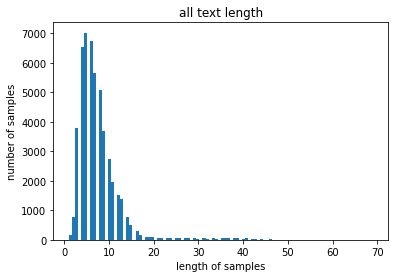

In [145]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
# bins는 가로축 구간의 개수
# (막대 그래프의 갯수)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [146]:
select_length = 25


def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# data_list에는 전체 문장 데이터들을 token화 시킨 뒤,
# 의미있는 단어들의 품사들만 필터링한 (불용어 처리한) 단어들의 집함임!    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9825827022718214


# 토큰 길이를 25로 설정한다면 전체 데이터의 99% 정도를 표현할 수 있다!
# 단, 25의 길이보다 큰 데이터들은 영향이 미미하여 굳이 삭제하지 않음!

In [147]:
# 단어 시퀀스 벡터 크기
MAX_SEQ_LEN = 25

#CNN 모델 구현

In [148]:
# Conv1D, 의도 분류 모델이기 때문에 softmax
# 의도는 일단 3가지만 분류

import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

#from utils.Preprocess import Preprocess
# 대신 직접 class 선언해줌! (import 파일 만들기 귀찮음)

class Preprocess:
    def __init__(self, word2index_dic='../train_tools/dict/chatbot_dict.bin' ,userdic='user_dic.tsv'): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

In [149]:
!pwd

# Load Data
data = pd.read_csv("train_data.csv")

# text는 모든 문장들의 list
text = data['text'].tolist()
# label은 모든 label의 list
label = data['label'].tolist()

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [150]:
data.tail()

,text,label
50175,선배님들은 아이출산하고 언제쯤 생리 시작하셨나요?,2
50176,부정출혈이 있고 난 후 며칠 뒤에 생리 시작하는지 아시는분 있나요...?,2
50177,언제 시작하고 언제 끝났는지,2
50178,며칠전에 머리를 매직하고 나서부터슬슬 여자로서의 자각은 가지고 다니기 시작했는데얼마...,2
50179,가을언제 시작햇다고 끝나냐 ...,2


In [151]:
text[:5]

['이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;',
 '작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시키는대 애시당초 비행기 자체가"자동항법으로 운행되는대 비밀번호가 필요해 그러니 파괴시켜야해"가 아닌 그냥 자기가 운전해서 가따박음그럴거면 그냥 안전하게 착륙해',
 '비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ',
 '용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀',
 '보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 철저함도 보였으면서 차번호도 안봐두고...글고 주유소에 불 지르면 될텐데... 글고 쪼매난 총으로 뭐 어쩌려고 미친놈 소굴에 따라가냐']

In [152]:
label[:5]

[0, 0, 0, 0, 0]

In [153]:
# Load preprocessor
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin',
               userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

단어 사전 로드 완료..


In [154]:
# Data preprocess

# !pip install tqdm
from tqdm import tqdm

sequences = []
check_keywords = True
# text는 모든 문장들의 list
for sentence in tqdm(text):

    # 문장을 [(단어1,품사1),(단어2,품사2)...] 로 변환
    pos = p.pos(sentence)

    # get_keywords(pos, without_tag=True) => 불용어 처리 후 품사(태그)없이 단어들만의 list
    # keywords : 불용어 처리된 [(단어1,품사1),(단어2,품사2)...], list형
    keywords = p.get_keywords(pos, without_tag=True)

    # 첫번째 keywords 와 sequence[0] 어떻게 대응되는지 체크해보고 싶음
    if check_keywords is True:
      print(keywords)
      check_keywords = False
    # 태그없이 '단어'만 있는 keywords에서 [[단어1,단어2],[단어1,단어2,단어3]...]들을 인덱싱해줌
    # 우리가 만든 단어사전에 없으면(OOV token이므로 인덱스 1로 고정)
    seq = p.get_wordidx_sequence(keywords)
    sequences.append(seq)

  0%|          | 184/50180 [00:00<00:27, 1814.64it/s]

['이', '영화', '있', '사람', '공유', '부탁', '제', '폰', '번호', '010', '4427', '2774', '연락', '한통', '만요', '^', '^']


100%|██████████| 50180/50180 [00:48<00:00, 1027.86it/s]


In [155]:
# 이렇게 대응됌

# ['이', '영화', '있', '사람', '공유', '부탁', '제', '폰', '번호', '010', '4427', '2774', '연락', '한통', '만요', '^', '^']
print(sequences[0])

[3, 49, 15, 82, 1642, 350, 287, 1180, 325, 33113, 73719, 73720, 217, 9572, 1248, 1, 1]


In [156]:
# set padding length & pad to sequences

# import 하지말고 직접 선언!
#from config.GlobalParams import MAX_SEQ_LEN


# 단어 시퀀스 벡터 크기 (데이터 99% 활용가능)
MAX_SEQ_LEN = 25

#from tensorflow.keras import preprocessing
# 최대 크기를 25단어로 하고 그 보다 길이가 작은 문장들은 뒤에 0이라는 의미없는 단어를 을 채워서 문장 길이를 25단어로 맞춤
# https://wikidocs.net/83544
# padding=post 안하면 앞에서 부터 0을 채움

padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [174]:
# 모델에 넣어 학습하기 위해
# 문장별로 단어의 갯수를 25개로 맞춰줌

len(padded_seqs[0]) ,len(padded_seqs[1]),len(padded_seqs[2])

(25, 25, 25)

In [175]:
padded_seqs[0]

array([    3,    49,    15,    82,  1642,   350,   287,  1180,   325,
       33113, 73719, 73720,   217,  9572,  1248,     1,     1,     0,
           0,     0,     0,     0,     0,     0,     0], dtype=int32)

In [157]:
# data to tensor

# tf.data.Dataset.from_tensor_slices((데이터,라벨))
# 데이터와 라벨을 묶음
# https://yuna96.tistory.com/77
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, label))

# 섞어줌
# 크기만큼 섞어야 다섞임
# https://helloyjam.github.io/tensorflow/buffer-size-in-shuffle/
ds = ds.shuffle(len(text))

In [164]:
# set train & validation & test size

# 갯수 설정
# https://dacon.io/en/codeshare/5774
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

# 교차검증(?) take().take() 잘은 모르겠음
train_ds = ds.take(train_size).batch(100)
val_ds = ds.take(train_size).take(val_size).batch(100)
test_ds = ds.take(train_size + val_size).take(test_size).batch(100)

In [165]:
# Hyperparameter
# https://derekahndev.github.io/machine%20learning/chatbot-3/

dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 3

# 전체 단어수
VOCAB_SIZE = len(p.word_index) + 1

In [166]:
# CNN model definition
input_layer = Input(shape=(MAX_SEQ_LEN, ))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)
predictions = Dense(3, activation=tf.nn.softmax)(logits)

In [167]:
# CNN model create
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
              # 다중분류 : sparse_categorical_crossentropy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [168]:
!pwd

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data


In [169]:
# train model
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

# evaluate model
loss, accuracy = model.evaluate(test_ds, verbose=1)
print("Accuracy: %f" % (accuracy * 100))
print("loss : %f" % (loss))

# save model
model.save('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/models/intent_model.h5')

Epoch 1/3
352/352 [==============================] - 23s 22ms/step - loss: 0.1222 - accuracy: 0.9491 - val_loss: 0.0099 - val_accuracy: 0.9958
Epoch 2/3
352/352 [==============================] - 7s 21ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 3/3
51/51 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9990
Accuracy: 99.900359
loss : 0.002192


# 구현 모델 테스트

In [171]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing
import gc

# 의도 분류 모델 모듈
class IntentModel:
    def __init__(self, model_name, preprocess):

        # 의도 클래스별 레이블블
        self.labels = {0: "번호", 1: "장소", 2: "시간"}

        # 의도 분류 모델 불러오기
        self.model = load_model(model_name)

        # 챗봇 텍스트 전처리기
        self.p = preprocess

    # 의도 클래스 예측
    def predict_class(self, query):
        # 형태소 분석
        pos = self.p.pos(query)

        # 문장내 키워드 추출(불용어 제거)
        keywords = self.p.get_keywords(pos, without_tag=True)
        sequences = [self.p.get_wordidx_sequence(keywords)]

        # 단어 시퀀스 벡터 크기
        # from config.GlobalParams import MAX_SEQ_LEN
        # 변수로 선언해버림!@@@@@@@@@@@@@@@@@@@@@@@@

        # 패딩처리
        padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

        predict = self.model.predict(padded_seqs)
        predict_class = tf.math.argmax(predict, axis=1)
        return predict_class.numpy()[0]

In [172]:
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin',
               userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')

intent = IntentModel(model_name='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/models/intent_model.h5', preprocess=p)

query = "컴공 과사 번호 알려줘"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "회계팀 전화번호 알려줘."
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "학교 도서관 번호는??"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "본관 건물 위치 어디야?"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "학교 운동장은 위치 알려줘"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "기간 언제까지야?"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)

query = "OOO행사 제출 마감 날짜 알려줘"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)
print("="*30)

단어 사전 로드 완료..
1/1 [==============================] - 0s 165ms/step
컴공 과사 번호 알려줘
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
1/1 [==============================] - 0s 16ms/step
회계팀 전화번호 알려줘.
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
1/1 [==============================] - 0s 15ms/step
학교 도서관 번호는??
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
1/1 [==============================] - 0s 16ms/step
본관 건물 위치 어디야?
의도 예측 클래스 :  1
의도 예측 레이블 :  장소
1/1 [==============================] - 0s 17ms/step
학교 운동장은 위치 알려줘
의도 예측 클래스 :  1
의도 예측 레이블 :  장소
1/1 [==============================] - 0s 15ms/step
기간 언제까지야?
의도 예측 클래스 :  2
의도 예측 레이블 :  시간
1/1 [==============================] - 0s 15ms/step
OOO행사 제출 마감 날짜 알려줘
의도 예측 클래스 :  0
의도 예측 레이블 :  번호
